In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('blackFriday_train.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train.shape

(550068, 12)

In [5]:
df_test = pd.read_csv('blackFriday_test.csv')

In [6]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
df_train.drop(['User_ID'],axis=1,inplace=True)
df_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df_train.drop(['Product_ID'],axis=1,inplace=True)
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df_train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df_train.Age.replace({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2},inplace=True)

In [11]:
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,1,10,A,2,0,3,NaN,NaN,8370
1,F,1,10,A,2,0,1,6.0,14.0,15200
2,F,1,10,A,2,0,12,NaN,NaN,1422
3,F,1,10,A,2,0,12,14.0,NaN,1057
4,M,7,16,C,4+,0,8,NaN,NaN,7969


In [12]:
df_train.Gender.replace({'F':0,'M':1},inplace=True)
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200
2,0,1,10,A,2,0,12,NaN,NaN,1422
3,0,1,10,A,2,0,12,14.0,NaN,1057
4,1,7,16,C,4+,0,8,NaN,NaN,7969


In [14]:
city = pd.get_dummies(df_train['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [15]:
df_train = pd.concat([df_train,city],axis=1)

In [16]:
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


In [17]:
df_train.drop(['City_Category'],axis=1,inplace=True)
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,NaN,NaN,1422,0,0
3,0,1,10,2,0,12,14.0,NaN,1057,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969,0,1


In [18]:
df_train['Stay_In_Current_City_Years'] = df_train.Stay_In_Current_City_Years.str.replace('+','')

In [19]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [20]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,NaN,NaN,1422,0,0
3,0,1,10,2,0,12,14.0,NaN,1057,0,0
4,1,7,16,4,0,8,NaN,NaN,7969,0,1


In [21]:
df_train.isna().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [22]:
df_train.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [23]:
df_train['Product_Category_2'] = df_train['Product_Category_2'].fillna(df_train['Product_Category_2'].mode()[0])
df_train['Product_Category_3'] = df_train['Product_Category_3'].fillna(df_train['Product_Category_3'].mode()[0])
df_train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [24]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1


In [25]:
df_train.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2','Product_Category_3':'cat3'},inplace=True)

In [26]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1


In [27]:
columns_change = ['Gender','Age','Occupation','B','C','Stay_In_Current_City_Years','Marital_Status','cat1','cat2','cat3','Purchase']

In [28]:
df_train = df_train.reindex(columns=columns_change)
df_train.head()

,Gender,Age,Occupation,B,C,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase
0,0,1,10,0,0,2,0,3,8.0,16.0,8370
1,0,1,10,0,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,0,2,0,12,8.0,16.0,1422
3,0,1,10,0,0,2,0,12,14.0,16.0,1057
4,1,7,16,0,1,4,0,8,8.0,16.0,7969


In [29]:
df_train['Purchase'] = df_train['Purchase'].fillna(df_train['Purchase'].mean())

In [30]:
df_train.head()

,Gender,Age,Occupation,B,C,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase
0,0,1,10,0,0,2,0,3,8.0,16.0,8370
1,0,1,10,0,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,0,2,0,12,8.0,16.0,1422
3,0,1,10,0,0,2,0,12,14.0,16.0,1057
4,1,7,16,0,1,4,0,8,8.0,16.0,7969


In [31]:
df_train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
B                             0
C                             0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
dtype: int64

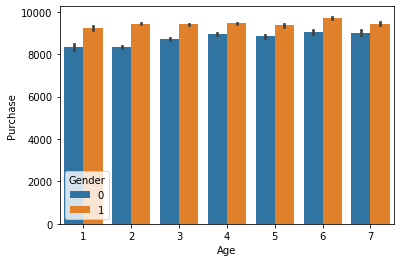

In [32]:
sns.barplot('Age','Purchase',hue='Gender',data=df_train)

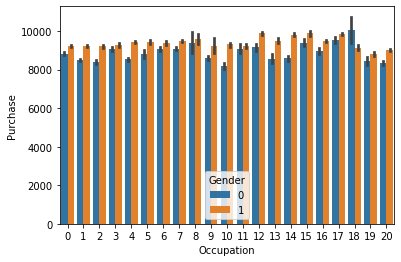

In [35]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df_train)

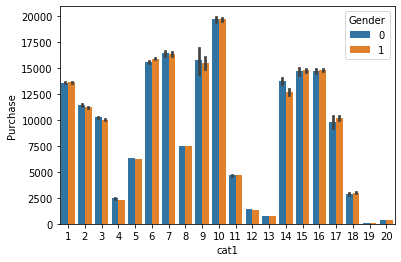

In [36]:
sns.barplot('cat1','Purchase', hue='Gender',data=df_train)

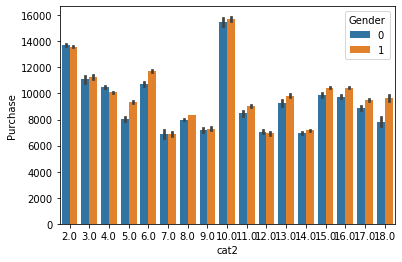

In [37]:
sns.barplot('cat2','Purchase', hue='Gender',data=df_train)

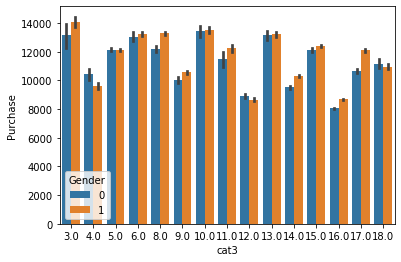

In [38]:
sns.barplot('cat3','Purchase', hue='Gender',data=df_train)

In [40]:
X=df_train.drop('Purchase',axis=1)

In [41]:
y=df_train['Purchase']

In [43]:
X.shape

(550068, 10)

In [44]:
y.shape

(550068,)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)


In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()

In [63]:
X_train = sc.fit_transform(X_train)

In [64]:
X_test = sc.transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rfg=RandomForestRegressor()

In [81]:
rfg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
rfg.score(X_train, y_train)

0.775372585844005

In [83]:
rfg.score(X_test,y_test)

0.6249260835414218